In [156]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter,ImageOps
from keras.preprocessing import image
import random
import cv2

import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Input, Reshape, LSTM, Bidirectional, TimeDistributed,BatchNormalization
import tensorflow as tf
import keras.backend as K
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn import preprocessing
imageList = os.listdir('../dataset/LSTMData')

(50, 32)


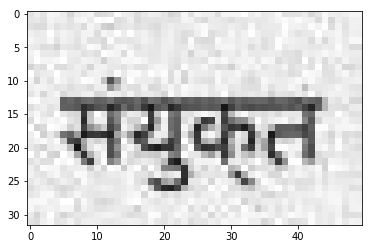

In [115]:
image2 = image.load_img("../dataset/LSTMData/"+imageList[1], color_mode="grayscale")
print(image2.size)
plt.imshow(image2, cmap='gray')

In [116]:
background = np.ones([32,180])*255
background.shape
background

array([[255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       ...,
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.]])

In [261]:
targetImageList = []
originalImageName = []
for img in imageList:
    try:
        name, extension = img.split('_')
        
        
        image2 = image.load_img("../dataset/LSTMData/"+img, color_mode="grayscale")
        img = np.array(image2)
        (wt, ht) = (128, 32)
        (h, w) = img.shape
        fx = w / wt
        fy = h / ht
        f = max(fx, fy)
        newSize = (max(min(wt, int(w / f)), 1), max(min(ht, int(h / f)), 1)) # scale according to f (result at least 1 and at most wt or ht)
        img = cv2.resize(np.array(img), newSize)
        target = np.ones([ht, wt]) * 255
        target[0:newSize[1], 0:newSize[0]] = img
        
        
        originalImageName.append(name)
        
        
        img = cv2.transpose(target)
        
        
      
        (m, s) = cv2.meanStdDev(img)
        m = m[0][0]
        s = s[0][0]
        img = img - m
        img = img / s if s>0 else img
        
        img = np.expand_dims(img, axis=2)
    
        targetImageList.append(img)
    except:
        print("error")
    

error


In [262]:
originalImageName[0]

'सचिव'

In [263]:
le = preprocessing.LabelEncoder()
imageName = le.fit_transform(originalImageName)
list(le.inverse_transform([691, 691]))

/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


['सचिव', 'सचिव']

In [264]:
np.shape(targetImageList)

(999, 128, 32, 1)

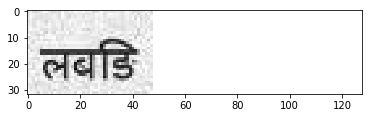

In [265]:
plt.imshow(target, cmap='gray')

Transpose

(128, 32)


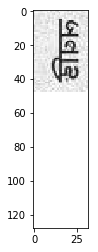

In [7]:
img = cv2.transpose(target)
print(img.shape)
plt.imshow(img, cmap='gray')

Normalize

(128, 32)


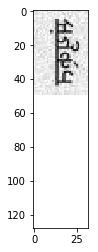

In [7]:
(m, s) = cv2.meanStdDev(img)
m = m[0][0]
s = s[0][0]
img = img - m
img = img / s if s>0 else img
plt.imshow(img, cmap='gray')
print(img.shape)

Loop through the image list to get truth text

In [8]:
a,b = imageList[0].split('_')
imageName = []
for image in imageList:
    name, extension = image.split('_')
    imageName.append(name)

Splitting training data into train and test

In [255]:
xTrain, xTest, yTrain, yTest = train_test_split(targetImageList, imageName, test_size = 0.2, random_state = 0)

(128, 32, 1)


TypeError: Invalid dimensions for image data

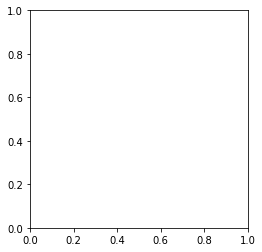

In [256]:
print(np.shape(xTrain[0]))
plt.imshow(xTest[0], cmap='gray')

In [180]:
kernelVals = [5, 5, 3, 3, 3]
featureVals = [1, 32, 64, 128, 256]
strideVals = poolVals = [(2,2), (2,2), (1,2), (1,2), (1,2)]
numLayers = len(strideVals)
inShp=(128,32,1)

model = Sequential()
model.add(Conv2D(1, (1,1), padding="same",input_shape=inShp, activation='relu'))

for i in range(numLayers):
    model.add(Conv2D(featureVals[i], (poolVals[i][0], poolVals[i][1]), padding="same", activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(poolVals[i][0], poolVals[i][1]), strides=(poolVals[i][0], poolVals[i][1])))
           
numHidden = 256
inputSize = (None,4,1,128)
model.add(TimeDistributed(Flatten()))
model.add(Bidirectional(LSTM((numHidden), batch_input_shape=(None,32,1,256), return_sequences=True)))
model.add(Bidirectional(LSTM((numHidden), return_sequences=True)))
model.add(Flatten())
model.add(Dense(1000, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
                optimizer=keras.optimizers.Adadelta(),
                metrics=['accuracy'])


In [181]:
try:
    input_shape =(None,128,32,1)
    model.build(input_shape)
    print(model.summary())
except AssertionError as assErr:
    print(assErr)
    

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_149 (Conv2D)          (None, 128, 32, 1)        2         
_________________________________________________________________
conv2d_150 (Conv2D)          (None, 128, 32, 1)        5         
_________________________________________________________________
batch_normalization_131 (Bat (None, 128, 32, 1)        4         
_________________________________________________________________
max_pooling2d_131 (MaxPoolin (None, 64, 16, 1)         0         
_________________________________________________________________
conv2d_151 (Conv2D)          (None, 64, 16, 32)        160       
_________________________________________________________________
batch_normalization_132 (Bat (None, 64, 16, 32)        128       
_________________________________________________________________
max_pooling2d_132 (MaxPoolin (None, 32, 8, 32)         0         
__________

In [182]:
input_shape =(None,128,32,1)
model.build(input_shape)
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_149 (Conv2D)          (None, 128, 32, 1)        2         
_________________________________________________________________
conv2d_150 (Conv2D)          (None, 128, 32, 1)        5         
_________________________________________________________________
batch_normalization_131 (Bat (None, 128, 32, 1)        4         
_________________________________________________________________
max_pooling2d_131 (MaxPoolin (None, 64, 16, 1)         0         
_________________________________________________________________
conv2d_151 (Conv2D)          (None, 64, 16, 32)        160       
_________________________________________________________________
batch_normalization_132 (Bat (None, 64, 16, 32)        128       
_________________________________________________________________
max_pooling2d_132 (MaxPoolin (None, 32, 8, 32)         0         
__________

In [183]:
x_test = np.array(xTest)
y_test = np.array(yTest)
y_train = np.array(yTrain)
x_train = np.array(xTrain)
history = model.fit(x_train,y_train,epochs=10,validation_data=(x_test, y_test))


Train on 799 samples, validate on 200 samples
Epoch 1/10
799/799 [==============================] - 39s 49ms/step - loss: 7.0151 - acc: 0.0063 - val_loss: 6.9438 - val_acc: 0.0000e+00
Epoch 2/10
799/799 [==============================] - 28s 35ms/step - loss: 6.3775 - acc: 0.0200 - val_loss: 7.1819 - val_acc: 0.0050
Epoch 3/10
799/799 [==============================] - 28s 35ms/step - loss: 5.6926 - acc: 0.0300 - val_loss: 7.0322 - val_acc: 0.0200
Epoch 4/10
799/799 [==============================] - 33s 42ms/step - loss: 5.0001 - acc: 0.0613 - val_loss: 7.3094 - val_acc: 0.0050
Epoch 5/10
799/799 [==============================] - 31s 38ms/step - loss: 4.2336 - acc: 0.1327 - val_loss: 7.3979 - val_acc: 0.0150
Epoch 6/10
799/799 [==============================] - 28s 35ms/step - loss: 3.1891 - acc: 0.3116 - val_loss: 7.7005 - val_acc: 0.0250
Epoch 7/10
799/799 [==============================] - 28s 35ms/step - loss: 1.8109 - acc: 0.6120 - val_loss: 8.0871 - val_acc: 0.0200
Epoch 8/10
7

In [192]:
result = model.predict(x_test)

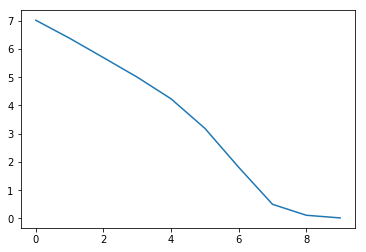

In [187]:
plt.plot(history.history['loss'])
plt.show()

In [193]:
result.size

200000

In [300]:
test_image = np.expand_dims(xTest[102], axis = 0)

prediction = model.predict(test_image)

In [301]:
predicted_class = np.argmax(prediction[0])
print(predicted_class)

470


In [302]:
le.inverse_transform(predicted_class)

/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


'बटमलाइन'

In [303]:
targetImg = np.reshape(xTest[102],(128,32))

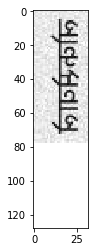

In [304]:
plt.imshow(targetImg,cmap='gray')

In [277]:
xTest[0].shape

(128, 32, 1)